## What are the most in demand skills for the most popular data roles?

First I'll import everything I'll need, just as before

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast
from datasets import load_dataset

These warnings are not important, and don't impact what I am trying to do. I don't get them in VSCode but you might if you are viewing on GitHub.

In [2]:
#Loading in the dataframe
df = pd.read_csv('hf://datasets/lukebarousse/data_jobs/data_jobs.csv')

In [3]:
#Narrowing down the country to Canada again
df_CA = df[df['job_country'] == 'Canada']

#Head function as before to check that everything is working
df_CA.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,NaN,NaN,NaN,BenchSci,"['python', 'sql', 'pytorch', 'pandas']","{'libraries': ['pytorch', 'pandas'], 'programm..."
59,Data Engineer,Data Engineer with Dremio Experience,"Toronto, ON, Canada",via LinkedIn,Contractor,False,Canada,2023-08-28 13:35:13,True,False,Canada,NaN,NaN,NaN,Iris Software Inc.,"['sql', 'hadoop', 'kubernetes']","{'libraries': ['hadoop'], 'other': ['kubernete..."
81,Data Analyst,Business Data Analyst,"Regina, SK, Canada",via ZipRecruiter,Full-time,False,Canada,2023-03-01 13:28:04,False,False,Canada,NaN,NaN,NaN,027 Parks Culture and Sport,NaN,NaN


# The job skills column is a string, so first I will convert it to a list

In [4]:
#First we remove NA values
df_CA['job_skills'] = df_CA['job_skills'].dropna()

#This line to see what we are working with
df_CA['job_skills']


C:\Users\Geoff\AppData\Local\Temp\ipykernel_24612\2388436986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CA['job_skills'] = df_CA['job_skills'].dropna()


50                   ['python', 'sql', 'pytorch', 'pandas']
59                          ['sql', 'hadoop', 'kubernetes']
81                                                      NaN
85                                    ['python', 'pytorch']
98                 ['python', 'aws', 'databricks', 'spark']
                                ...                        
785317    ['sql', 'python', 'sql server', 'snowflake', '...
785327                                     ['sql', 'azure']
785339    ['sql', 'python', 'sql server', 'mysql', 'post...
785511    ['sql', 'nosql', 'python', 'java', 'cassandra'...
785643                                    ['word', 'excel']
Name: job_skills, Length: 16029, dtype: object

In [5]:

# Initialize an empty list to store the split skills for the new column
split_skills = []

# For loop to split the skills and add them to the new column
for i in df_CA['job_skills']:
    if pd.notna(i):  # Check if the value is not NaN or None
        # Split the skills by comma and strip whitespace
        split_skills.append([skill.strip() for skill in i.split(',')])
    else:
        # Handle missing values by appending an empty list
        split_skills.append([])

# Add the new column to the DataFrame
df_CA['split_skills'] = split_skills

df_CA['split_skills']

C:\Users\Geoff\AppData\Local\Temp\ipykernel_24612\1730901648.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CA['split_skills'] = split_skills


50                 [['python', 'sql', 'pytorch', 'pandas']]
59                        [['sql', 'hadoop', 'kubernetes']]
81                                                       []
85                                  [['python', 'pytorch']]
98               [['python', 'aws', 'databricks', 'spark']]
                                ...                        
785317    [['sql', 'python', 'sql server', 'snowflake', ...
785327                                   [['sql', 'azure']]
785339    [['sql', 'python', 'sql server', 'mysql', 'pos...
785511    [['sql', 'nosql', 'python', 'java', 'cassandra...
785643                                  [['word', 'excel']]
Name: split_skills, Length: 16029, dtype: object

In [6]:
df_skills = df_CA.explode('split_skills')

df_skills[['job_title','job_skills','split_skills']]


,job_title,job_skills,split_skills
50,Sr ML Engineer - Research & NLP (Remote),"['python', 'sql', 'pytorch', 'pandas']",['python'
50,Sr ML Engineer - Research & NLP (Remote),"['python', 'sql', 'pytorch', 'pandas']",'sql'
50,Sr ML Engineer - Research & NLP (Remote),"['python', 'sql', 'pytorch', 'pandas']",'pytorch'
50,Sr ML Engineer - Research & NLP (Remote),"['python', 'sql', 'pytorch', 'pandas']",'pandas']
59,Data Engineer with Dremio Experience,"['sql', 'hadoop', 'kubernetes']",['sql'
...,...,...,...
785511,Data Engineer,"['sql', 'nosql', 'python', 'java', 'cassandra'...",'spark'
785511,Data Engineer,"['sql', 'nosql', 'python', 'java', 'cassandra'...",'airflow'
785511,Data Engineer,"['sql', 'nosql', 'python', 'java', 'cassandra'...",'kafka']
785643,Analyste,"['word', 'excel']",['word'


lets clean up the split_skills column

In [7]:
df_skills['split_skills'] = df_skills['split_skills'].str.replace("[","")
#Here's a copied line from above, just with "]" instead of "["
df_skills['split_skills'] = df_skills['split_skills'].str.replace("]","")

#This is here to check that removing the square brackets worked
df_skills['split_skills']

50         'python'
50            'sql'
50        'pytorch'
50         'pandas'
59            'sql'
            ...    
785511      'spark'
785511    'airflow'
785511      'kafka'
785643       'word'
785643      'excel'
Name: split_skills, Length: 94073, dtype: object

## Next, lets have a look at the size of the number of skills, pertaining to each job title

In [8]:
df_skills_count = df_skills.groupby(['split_skills','job_title_short']).size()

df_skills_count


split_skills  job_title_short      
'airflow'     Business Analyst           10
              Cloud Engineer             17
              Data Analyst               31
              Data Engineer            1022
              Data Scientist             84
                                       ... 
'zoom'        Data Scientist              8
              Senior Data Analyst         3
              Senior Data Engineer        5
              Senior Data Scientist       3
              Software Engineer          12
Length: 1485, dtype: int64

Interesting, lets check what type of object df_skills_count is

In [9]:
#lets check what type of object this is
type(df_skills_count)

pandas.core.series.Series

this is of the type "series" which isn't what we want. We want this to be a data frame, so lets change that


In [10]:
#Making df_skills_count into a dataframe
df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count

,split_skills,job_title_short,skill_count
0,'airflow',Business Analyst,10
1,'airflow',Cloud Engineer,17
2,'airflow',Data Analyst,31
3,'airflow',Data Engineer,1022
4,'airflow',Data Scientist,84
...,...,...,...
1480,'zoom',Data Scientist,8
1481,'zoom',Senior Data Analyst,3
1482,'zoom',Senior Data Engineer,5
1483,'zoom',Senior Data Scientist,3


lets sort the skill counts from the highest value to the lowest

In [11]:
df_skills_count.sort_values(by='skill_count',ascending = False, inplace = True)

df_skills_count

,split_skills,job_title_short,skill_count
1225,'sql',Data Engineer,3794
949,'python',Data Engineer,3567
108,'azure',Data Engineer,2217
98,'aws',Data Engineer,2030
1171,'spark',Data Engineer,1948
...,...,...,...
1322,'tidyr',Machine Learning Engineer,1
559,'jquery',Data Analyst,1
1327,'trello',Data Analyst,1
810,'openstack',Data Scientist,1


## Next lets narrow our search to the three common roles of data analyst, data engineer and data scientist

In [12]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = job_titles[:3]

job_titles

['Data Engineer', 'Data Analyst', 'Senior Data Engineer']

## Lets make some plots

<function matplotlib.pyplot.show(close=None, block=None)>

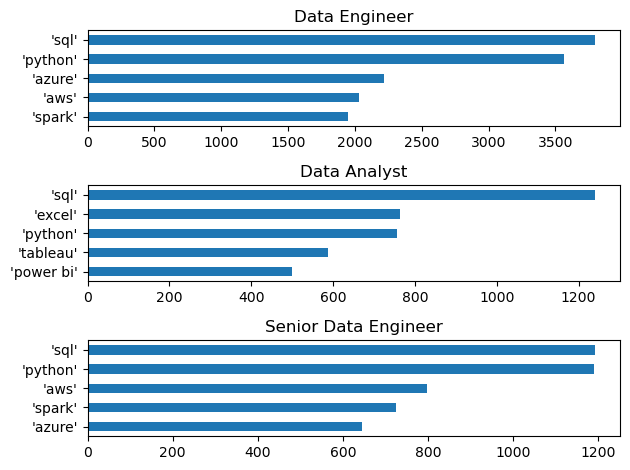

In [13]:
fig, ax = plt.subplots(len(job_titles), 1)



for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='split_skills', y='skill_count', ax=ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)

#This is so that there is no overlap in tick markers and graph names
plt.tight_layout()    

plt.show

## Next we'll go back to working with df_CA. Lets merge the df_skills_count with df_CA

In [14]:
df_job_title_count = df_CA['job_title_short'].value_counts().reset_index(name='jobs_total')

In [15]:
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, how='left',on='job_title_short')

df_skills_percent

,split_skills,job_title_short,skill_count,jobs_total
0,'sql',Data Engineer,3794,5828
1,'python',Data Engineer,3567,5828
2,'azure',Data Engineer,2217,5828
3,'aws',Data Engineer,2030,5828
4,'spark',Data Engineer,1948,5828
...,...,...,...,...
1480,'tidyr',Machine Learning Engineer,1,566
1481,'jquery',Data Analyst,1,2365
1482,'trello',Data Analyst,1,2365
1483,'openstack',Data Scientist,1,1825


In [16]:
#I multiply by 100 to get into the correct percent format
df_skills_percent['skill_percentage'] = 100 * df_skills_percent['skill_count'] / df_skills_percent['jobs_total']

df_skills_percent

,split_skills,job_title_short,skill_count,jobs_total,skill_percentage
0,'sql',Data Engineer,3794,5828,65.099520
1,'python',Data Engineer,3567,5828,61.204530
2,'azure',Data Engineer,2217,5828,38.040494
3,'aws',Data Engineer,2030,5828,34.831846
4,'spark',Data Engineer,1948,5828,33.424846
...,...,...,...,...,...
1480,'tidyr',Machine Learning Engineer,1,566,0.176678
1481,'jquery',Data Analyst,1,2365,0.042283
1482,'trello',Data Analyst,1,2365,0.042283
1483,'openstack',Data Scientist,1,1825,0.054795


Now lets graph this

<function matplotlib.pyplot.show(close=None, block=None)>

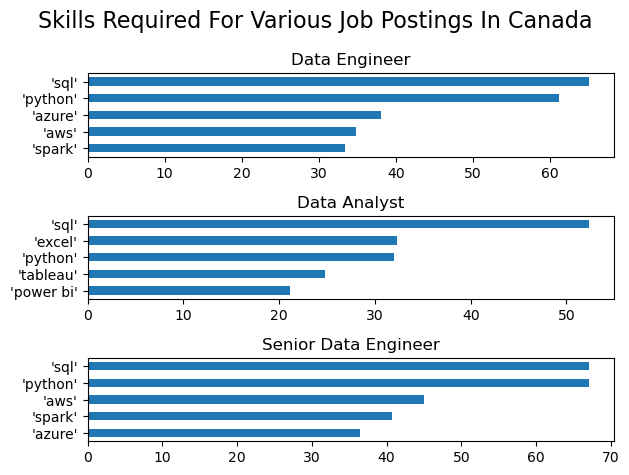

In [17]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='split_skills', y='skill_percentage', ax=ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)

fig.suptitle('Skills Required For Various Job Postings In Canada', fontsize=16)

#This is so that there is no overlap in tick markers and graph names
plt.tight_layout()    

plt.show

lets make this look a bit better with Seaborn

<function matplotlib.pyplot.show(close=None, block=None)>

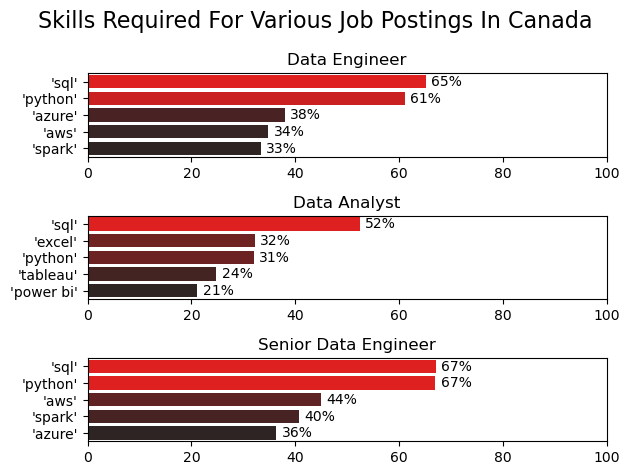

In [18]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percentage', y='split_skills', ax=ax[i], hue='skill_count', palette='dark:r',).set(title = job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,100)

    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v+1, n, f'{int(v)}%', va='center')

fig.suptitle('Skills Required For Various Job Postings In Canada', fontsize=16)

#This is so that there is no overlap in tick markers and graph names
plt.tight_layout()    

plt.show